# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercitazione 5</span>


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

L'esercizio richiede di utilizzare l'algoritmo di Metropolis per campionare le densità di probabilità date dal modulo quadro delle funzioni d'onda dello stato fondamentale $\Psi_{1,0,0}$ e dello stato $\Psi_{2,1,0}$ dell'atomo di idrogeno, ossia:
$$
|\Psi_{1,0,0}(x,y,z)|^2= \frac{1}{\pi} e^{-2 \sqrt{x^2+y^2+z^2}}
$$

$$
|\Psi_{2,1,0}(x,y,z)|^2=\frac{1}{32 \pi} z^2 e^{-\frac{\sqrt{x^2+y^2+z^2}}{2}}
$$

avendole espresse in unità di raggio di Bohr $a_{0}$:  $\tilde{r}=\frac{r}{{a_{0}}}=\frac{\sqrt{x^2+y^2+z^2}}{a_{0}}$.


Quindi, a partire dalle posizioni campionate, stimare $\left\langle \tilde{r} \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle \tilde{r} \right\rangle_{\Psi_{2,1,0}}$, da confrontare con i valori teorici:
$$
\left\langle \tilde{r} \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}
\quad
\left\langle \tilde{r} \right\rangle_{\Psi_{2,1,0}}=5.
$$
</span>

### Probabilità di transizione $T(\vec{x}|\vec{y})$ uniforme

L'algoritmo, allo step $n$, si trova in posizione $(x_{n}, y_{n}, z_{n})$ e propone la posizione successiva $x'$ estraendo, in ciascuna delle tre direzioni, un passo dalla distribuzione uniforme in $(-\delta, \delta)$. Se il punto $x'$ è a probabilità maggiore del punto di partenza, esso viene automaticamente accettato. Se invece tale punto ha una probabilità minore del punto di partenza, esso viene accettato con probabilità $\alpha$ data dal rapporto tra la probabilità del nuovo punto e la probabilità del punto di partenza. Se il punto estratto viene accettato, $x_{n+1}=x'$, altrimenti $x_{n+1}=x_{n}$. Asintoticamente, l'algoritmo è in grado di campionare la distribuzione di probabilità. 

Ho fissato come posizioni iniziali delle posizioni a probabilità non nulla:
- (0,1,1) per $\Psi_{1,0,0}$
- (1,1,5) per $\Psi_{2,1,0}$

Ho individuato come passo della distribuzione uniforme:
- $\delta \approx 1.5$ per $\Psi_{1,0,0}$
- $\delta \approx 3.3$ per $\Psi_{2,1,0}$
 
così da ottenere un'accettazione dei passi proposti dell'ordine del 50\%, in modo da evitare bassa efficienza dell'algoritmo per un $\delta$ troppo grande o alta correlazione fra i punti campionati per un $\delta$ troppo piccolo. 

Ho individuato come tempo di equilibrazione $M_{eq}=10^4$ iterazioni, dopo il quale si assume che il sistema sia equilibrato e che i campioni rappresentino la distribuzione desiderata.
Terminata la fase di equilibrazione, durante il campionamento, per ciascuna delle due densità di probabilità è stata effettuata la misura del raggio $\tilde{r}$ a partire dalle posizioni campionate. Ho iterato l'algoritmo $M=2 \cdot 10^{6}$ volte, suddivise in $N=200$ blocchi, così da avere blocchi da $10^4$ lanci ciascuno.

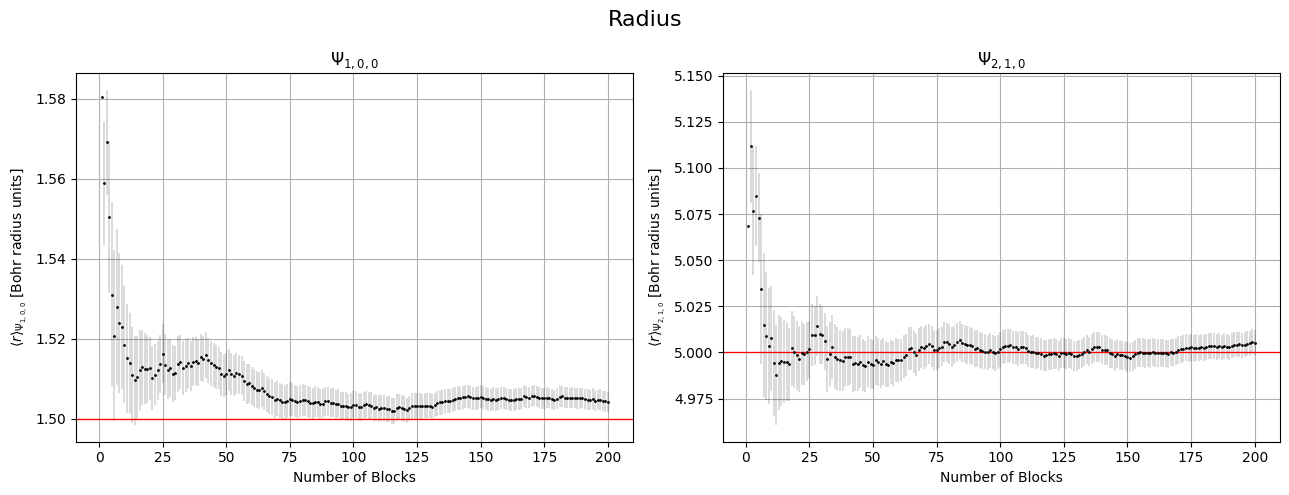

In [55]:
# Load data for radius 100
r100_data = np.loadtxt('OUTPUT/unif_r100.dat', usecols=(0, 1, 2))

# Load data for radius 210
r210_data = np.loadtxt('OUTPUT/unif_r210.dat', usecols=(0, 1, 2))

# Extract x (number of blocks) and y (radius value) for each dataset
x = r100_data[:, 0]
y100 = r100_data[:, 1]
y210 = r210_data[:, 1]
error100 = r100_data[:, 2]
error210 = r210_data[:, 2]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot for radius 100
ax1.errorbar(x, y100, yerr=error100, fmt='o', markersize=1, color='black', ecolor='black', linewidth=0.2)
ax1.set_title(r'$\Psi_{1,0,0}$')
ax1.set_xlabel('Number of Blocks')
ax1.set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [Bohr radius units]')
ax1.axhline(y=1.5, color='red', linewidth=0.9)
ax1.grid(True)

# Plot for radius 210
ax2.errorbar(x, y210, yerr=error210, fmt='o', markersize=1, color='black', ecolor='black', linewidth=0.2)
ax2.set_title(r'$\Psi_{2,1,0}$')
ax2.set_xlabel('Number of Blocks')
ax2.set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [Bohr radius units]')
ax2.axhline(y=5, color='red', linewidth=0.9)
ax2.grid(True)

fig.suptitle('Radius', fontsize=16)

plt.tight_layout()
plt.show()

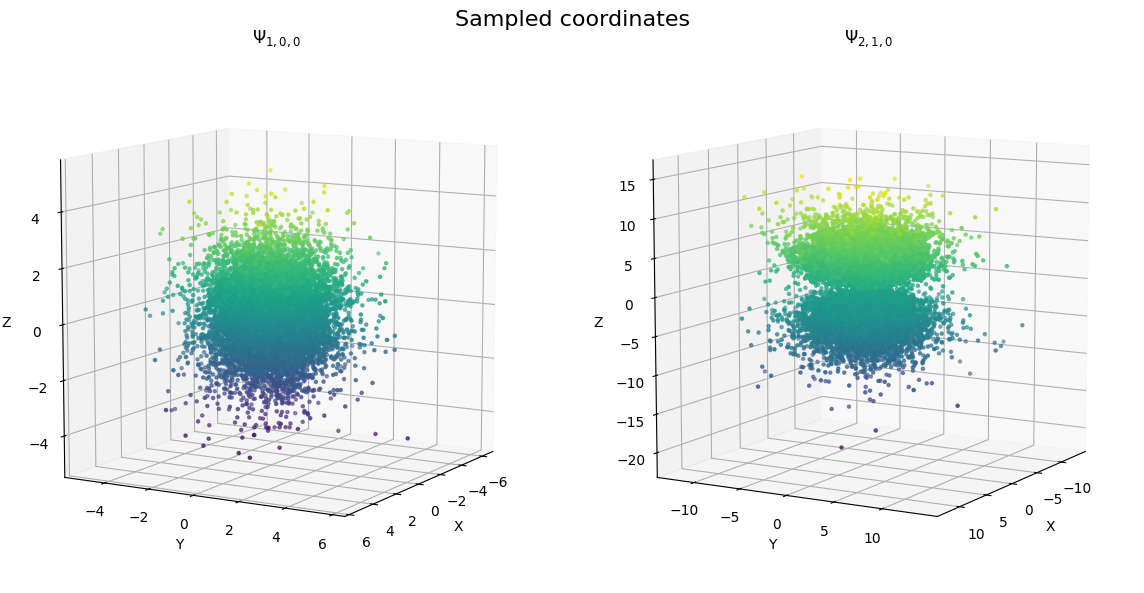

In [56]:
# Load data for coordinates 100
coordinates_100_data = np.loadtxt('OUTPUT/unif_coordinates_100.dat', usecols=(0, 1, 2))

# Load data for coordinates 210
coordinates_210_data = np.loadtxt('OUTPUT/unif_coordinates_210.dat', usecols=(0, 1, 2))

# Extract x, y, and z coordinates for each dataset
x_100 = coordinates_100_data[:, 0]
y_100 = coordinates_100_data[:, 1]
z_100 = coordinates_100_data[:, 2]

x_210 = coordinates_210_data[:, 0]
y_210 = coordinates_210_data[:, 1]
z_210 = coordinates_210_data[:, 2]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Plot for coordinates 100
ax1.scatter(x_100, y_100, z_100, c=z_100, marker='.')
ax1.set_title(r'$\Psi_{1,0,0}$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(10, 30)
ax1.set_box_aspect([1,1,1])  # set aspect ratio

# Plot for coordinates 210
ax2.scatter(x_210, y_210, z_210, c=z_210, marker='.')
ax2.set_title(r'$\Psi_{2,1,0}$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(10, 30)
ax2.set_box_aspect([1,1,1])  # set aspect ratio

fig.suptitle('Sampled coordinates', fontsize=16)
plt.tight_layout()

plt.show()

#### Partenza lontano dall'origine

Ho impostato come punto di partenza un punto lontano dall'origine ed ho visualizzato le coordinate campionate dall'algoritmo. Nelle fasi iniziali, l'algoritmo tende a dirigersi velocemente verso la zona ad alta probabilità ed una volta raggiunta, campiona lì efficaciemente.

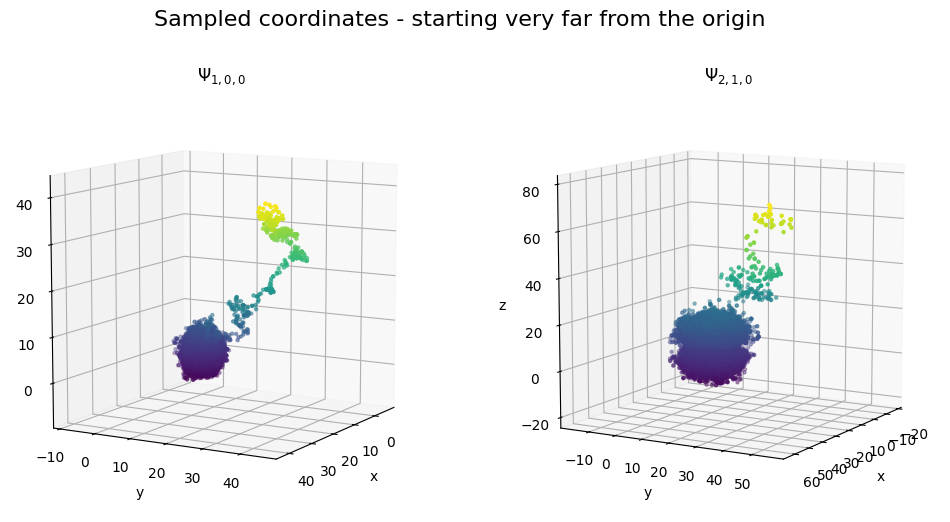

In [15]:
# Load data for coordinates 100
coordinates_100_data = np.loadtxt('OUTPUT/unif_coordinates_100_far.dat', usecols=(0, 1, 2))

# Load data for coordinates 210
coordinates_210_data = np.loadtxt('OUTPUT/unif_coordinates_210_far.dat', usecols=(0, 1, 2))

# Extract x, y, and z coordinates for each dataset
x_100 = coordinates_100_data[:, 0]
y_100 = coordinates_100_data[:, 1]
z_100 = coordinates_100_data[:, 2]

x_210 = coordinates_210_data[:, 0]
y_210 = coordinates_210_data[:, 1]
z_210 = coordinates_210_data[:, 2]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Plot for coordinates 100
ax1.scatter(x_100, y_100, z_100, c=z_100, marker='.')
ax1.set_title(r'$\Psi_{1,0,0}$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
ax1.set_box_aspect([1,1,1])  # set aspect ratio

# Plot for coordinates 210
ax2.scatter(x_210, y_210, z_210, c=z_210, marker='.')
ax2.set_title(r'$\Psi_{2,1,0}$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)
ax2.set_box_aspect([1,1,1])  # set aspect ratio

fig.suptitle('Sampled coordinates - starting very far from the origin', fontsize=16)

plt.show()

### Probabilità di transizione $T(\vec{x}|\vec{y})$ gaussiana

Ho ripetuto il procedimento descritto sopra, ma proponendo le nuove posizioni attraverso una distribuzione Gaussiana centrata nel punto $x_{n}$ e avente $\sigma$ selezionato in modo da avere un'accettazione dell'ordine del 50\%:
- $\sigma \approx 1$ per $\Psi_{1,0,0}$
- $\sigma \approx 2.2$ per $\Psi_{2,1,0}$

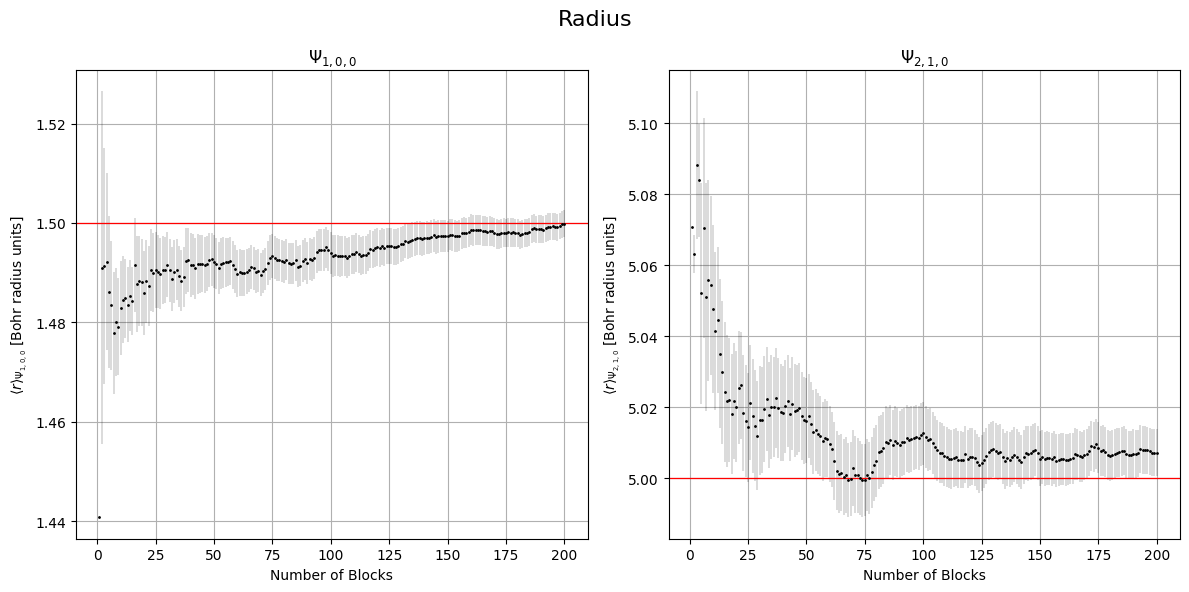

In [53]:
# Load data for radius 100
r100_data = np.loadtxt('OUTPUT/gauss_r100.dat', usecols=(0, 1, 2))

# Load data for radius 210
r210_data = np.loadtxt('OUTPUT/gauss_r210.dat', usecols=(0, 1, 2))

# Extract x (number of blocks) and y (radius value) for each dataset
x = r100_data[:, 0]
y100 = r100_data[:, 1]
y210 = r210_data[:, 1]
error100 = r100_data[:, 2]
error210 = r210_data[:, 2]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for radius 100
ax1.errorbar(x, y100, yerr=error100, fmt='o', markersize=1, color='black', ecolor='black', linewidth=0.2)
ax1.set_title(r'$\Psi_{1,0,0}$')
ax1.set_xlabel('Number of Blocks')
ax1.set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [Bohr radius units]')
ax1.axhline(y=1.5, color='red', linewidth=0.9)
ax1.grid(True)

# Plot for radius 210
ax2.errorbar(x, y210, yerr=error210, fmt='o', markersize=1, color='black', ecolor='black', linewidth=0.2)
ax2.set_title(r'$\Psi_{2,1,0}$')
ax2.set_xlabel('Number of Blocks')
ax2.set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [Bohr radius units]')
ax2.axhline(y=5, color='red', linewidth=0.9)
ax2.grid(True)

fig.suptitle('Radius', fontsize=16)

plt.tight_layout()
plt.show()

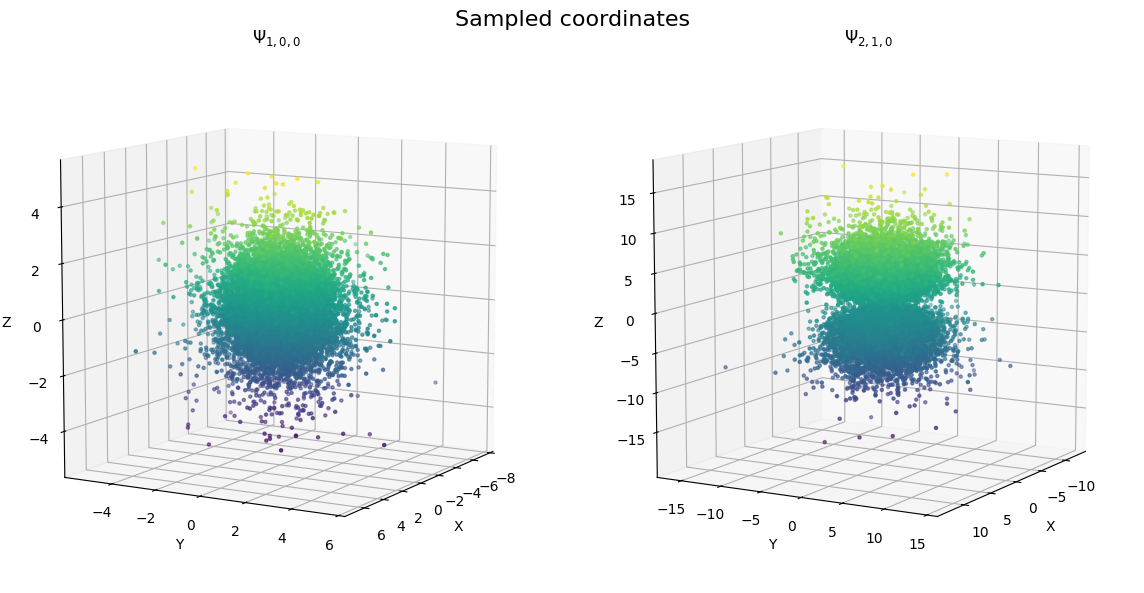

In [54]:
# Load data for coordinates 100
coordinates_100_data = np.loadtxt('OUTPUT/gauss_coordinates_100.dat', usecols=(0, 1, 2))

# Load data for coordinates 210
coordinates_210_data = np.loadtxt('OUTPUT/gauss_coordinates_210.dat', usecols=(0, 1, 2))

# Extract x, y, and z coordinates for each dataset
x_100 = coordinates_100_data[:, 0]
y_100 = coordinates_100_data[:, 1]
z_100 = coordinates_100_data[:, 2]

x_210 = coordinates_210_data[:, 0]
y_210 = coordinates_210_data[:, 1]
z_210 = coordinates_210_data[:, 2]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Plot for coordinates 100
ax1.scatter(x_100, y_100, z_100, c=z_100, marker='.')
ax1.set_title(r'$\Psi_{1,0,0}$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(10, 30)
ax1.set_box_aspect([1,1,1])  # set aspect ratio

# Plot for coordinates 210
ax2.scatter(x_210, y_210, z_210, c=z_210, marker='.')
ax2.set_title(r'$\Psi_{2,1,0}$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(10, 30)
ax2.set_box_aspect([1,1,1])  # set aspect ratio

fig.suptitle('Sampled coordinates', fontsize=16)
plt.tight_layout()

plt.show()

#### Confronto tra le due probabilità di transizione

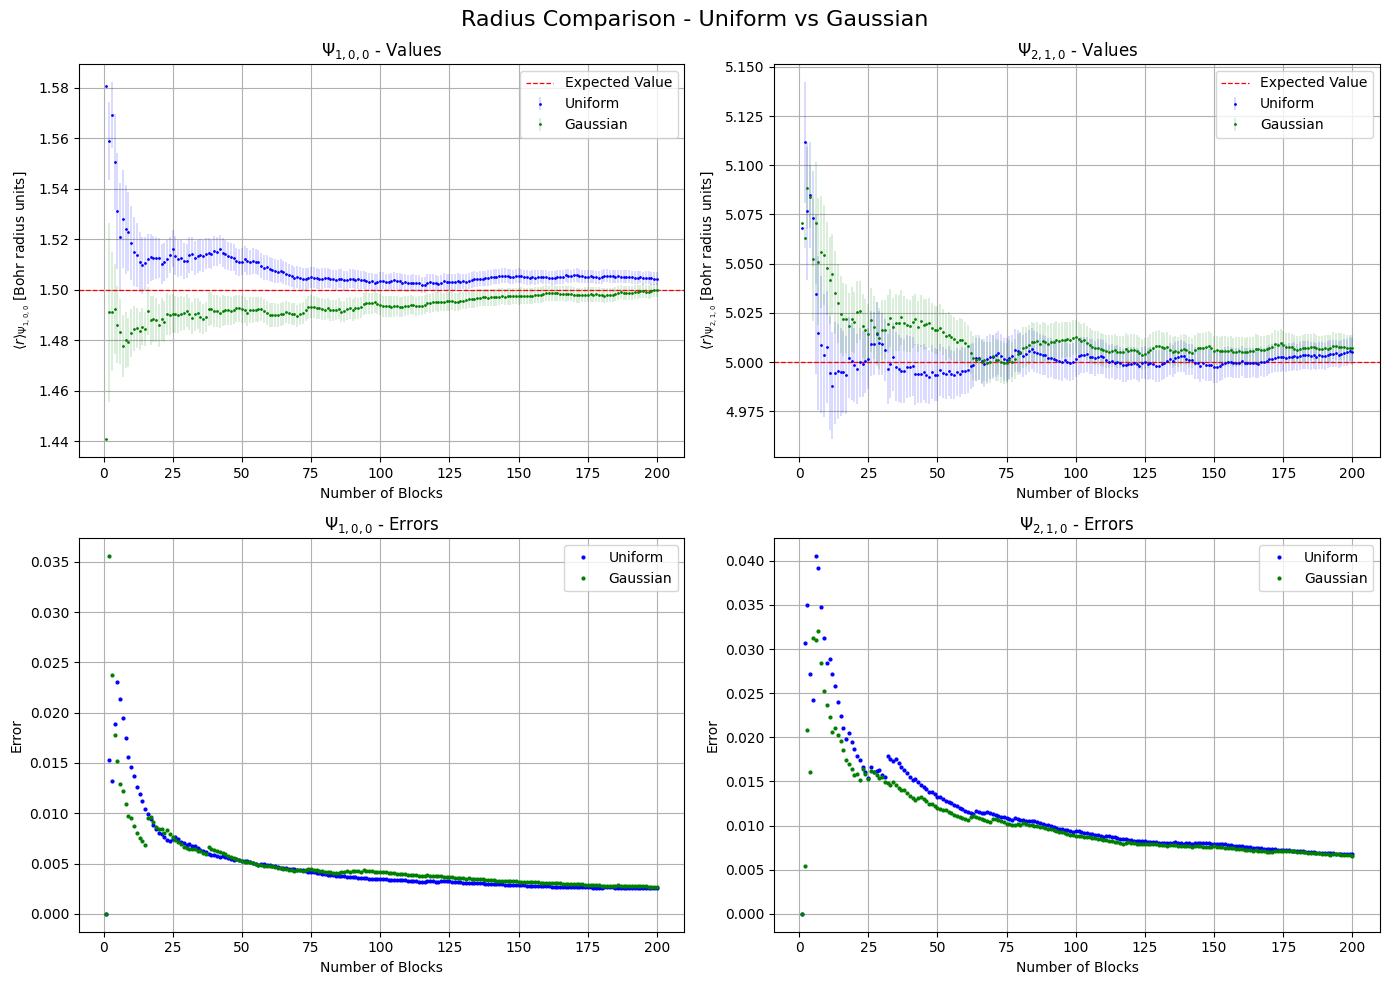

In [51]:
# Load data for uniform distribution
r100_unif_data = np.loadtxt('OUTPUT/unif_r100.dat', usecols=(0, 1, 2))
r210_unif_data = np.loadtxt('OUTPUT/unif_r210.dat', usecols=(0, 1, 2))

# Load data for gaussian distribution
r100_gauss_data = np.loadtxt('OUTPUT/gauss_r100.dat', usecols=(0, 1, 2))
r210_gauss_data = np.loadtxt('OUTPUT/gauss_r210.dat', usecols=(0, 1, 2))

# Extract x (number of blocks) and y (radius value) for each dataset
x_unif = r100_unif_data[:, 0]
y100_unif = r100_unif_data[:, 1]
y210_unif = r210_unif_data[:, 1]
error100_unif = r100_unif_data[:, 2]
error210_unif = r210_unif_data[:, 2]

x_gauss = r100_gauss_data[:, 0]
y100_gauss = r100_gauss_data[:, 1]
y210_gauss = r210_gauss_data[:, 1]
error100_gauss = r100_gauss_data[:, 2]
error210_gauss = r210_gauss_data[:, 2]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for radius 100 (values)
axes[0, 0].errorbar(x_unif, y100_unif, yerr=error100_unif, fmt='o', markersize=1, color='blue', ecolor='blue', linewidth=0.2, label='Uniform')
axes[0, 0].errorbar(x_gauss, y100_gauss, yerr=error100_gauss, fmt='o', markersize=1, color='green', ecolor='green', linewidth=0.2, label='Gaussian')
axes[0, 0].set_title(r'$\Psi_{1,0,0}$ - Values')
axes[0, 0].set_xlabel('Number of Blocks')
axes[0, 0].set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [Bohr radius units]')
axes[0, 0].axhline(y=1.5, color='red', linewidth=0.9, linestyle='--', label='Expected Value')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for radius 210 (values)
axes[0, 1].errorbar(x_unif, y210_unif, yerr=error210_unif, fmt='o', markersize=1, color='blue', ecolor='blue', linewidth=0.2, label='Uniform')
axes[0, 1].errorbar(x_gauss, y210_gauss, yerr=error210_gauss, fmt='o', markersize=1, color='green', ecolor='green', linewidth=0.2, label='Gaussian')
axes[0, 1].set_title(r'$\Psi_{2,1,0}$ - Values')
axes[0, 1].set_xlabel('Number of Blocks')
axes[0, 1].set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [Bohr radius units]')
axes[0, 1].axhline(y=5, color='red', linewidth=0.9, linestyle='--', label='Expected Value')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot for radius 100 (errors)
axes[1, 0].plot(x_unif, error100_unif, 'o', markersize=2, color='blue', label='Uniform')
axes[1, 0].plot(x_gauss, error100_gauss, 'o', markersize=2, color='green', label='Gaussian')
axes[1, 0].set_title(r'$\Psi_{1,0,0}$ - Errors')
axes[1, 0].set_xlabel('Number of Blocks')
axes[1, 0].set_ylabel('Error')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot for radius 210 (errors)
axes[1, 1].plot(x_unif, error210_unif, 'o', markersize=2, color='blue', label='Uniform')
axes[1, 1].plot(x_gauss, error210_gauss, 'o', markersize=2, color='green', label='Gaussian')
axes[1, 1].set_title(r'$\Psi_{2,1,0}$ - Errors')
axes[1, 1].set_xlabel('Number of Blocks')
axes[1, 1].set_ylabel('Error')
axes[1, 1].legend()
axes[1, 1].grid(True)

fig.suptitle('Radius Comparison - Uniform vs Gaussian', fontsize=16)

plt.tight_layout()
plt.show()


Con entrambe le funzioni di transizione $T(\vec{x}|\vec{y})$, le densità di probabilità sono asintoticamente campionate efficacemente ed i valori medi calcolati sono compatibili con i valori teorici. Anche gli errori mostrano un andamento simile, specialmente negli ultimi blocchi della simulazione.